This notebook has been adapated from a Data Science Group Tutorial created to explore the 311 call data.  It's using the call data from 2020.  Goal is to figure out why there are 172459 observations where ServiceDate is earlier than the CreateDate.  

Using the 2020 dataset with rows with null dates were deleted, 73014 rows were deleted because ServiceDate is larger than 8/11/2022 and date columns were converted to datetime format

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.options.display.max_columns = None

In [3]:
pd.options.display.max_rows = None

<font size=5, color=green>Investigate on all the date columns<font>

<font size=3 color=gray>First of all we need to convert the type from object to date and then check to make sure there is not any date greater than today's date, then we can investigate for these criterias:<br>1. createddate <= servicedate<br>2. servicedate <= closeddate<br>3. closeddate <= updateddate<br>but we want to keep NaN value for these date columns<font>

In [9]:
#Import new data set of rows where CreatedDate is larger than ServiceDate
#Out of 1417538 observations, 172459 rows where CreatedDated is larger than ServiceDate
#to create this data set from 2020 call data set
# 1. rows with null dates were deleted
# 2. rows with ServiceDate larger than date retrieved were deleted
# 3. create new data set: dfCD_SD = df311_2020[df311_2020.CreatedDate > df311_2020.ServiceDate]
# 4. CreatedDateMonth column created

dfCD_SD = pd.read_csv(r'C:\Documents\projects\HackLA\311\data\CreatedDate_larger_ServiceDate.csv', low_memory = False, index_col = 0)

In [13]:
dfCD_SD.shape

(172459, 26)

In [14]:
dfCD_SD.head(2)

,CreatedDateMonth,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AssignTo,ServiceDate,ClosedDate,AddressVerified,Address,ZipCode,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
391,1,2020-01-01,2020-01-01 11:30:00,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,PGS,2019-12-05 11:11:00,2020-01-01 11:30:00,Y,"2639 S ROBERTSON BLVD, 90034",90034.0,632.0,H,6.0,South Los Angeles APC,5.0,NaN,61.0,SOUTH ROBERTSON NC,WEST LOS ANGELES
392,1,2020-01-01,2020-01-01 11:30:00,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,PGS,2019-12-05 11:11:00,2020-01-01 11:30:00,Y,"2743 S BEVERLY DR, 90034",90034.0,632.0,G,6.0,West Los Angeles APC,5.0,NaN,61.0,SOUTH ROBERTSON NC,WEST LOS ANGELES


In [15]:
dfCD_SD['RequestType'].unique()

array(['Graffiti Removal', 'Single Streetlight Issue',
       'Multiple Streetlight Issue'], dtype=object)

#### They are made up of RequestType of Graffiti and streetlight issues

In [16]:
dfCD_SD['RequestType'].value_counts()

Graffiti Removal              172382
Single Streetlight Issue          45
Multiple Streetlight Issue        32
Name: RequestType, dtype: int64

### They are largely Graffiti Removal

In [43]:
# to me - delete columns that probably won't matter when trying to figure out this question.  
# Then move the CreatedDateMonth next to createdDate, because I'll have to do one for each Date row.
# Remember to keep saving the data file
#figure out whatever aspects show something in this subset dataframe that where createddate > service date
#like value count of owner, request type, request source - then can ask for suggestions on who to contact
#also, compare to other years if have time

In [17]:
#Create a dataframe of just the dates to compare them
df_dates = dfCD_SD.filter(['CreatedDate','UpdatedDate','ServiceDate', 'ClosedDate'], axis=1)

In [18]:
df_dates.head()

,CreatedDate,UpdatedDate,ServiceDate,ClosedDate
391,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
392,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
393,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
394,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
395,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00


In [19]:
df_dates.dtypes

CreatedDate    object
UpdatedDate    object
ServiceDate    object
ClosedDate     object
dtype: object

In [22]:
#Make sure they are all datetime64 type
df_dates = df_dates.astype({'CreatedDate': 'datetime64', 'UpdatedDate': 'datetime64', 'ServiceDate': 'datetime64', 'ClosedDate': 'datetime64'})

In [23]:
df_dates.dtypes

CreatedDate    datetime64[ns]
UpdatedDate    datetime64[ns]
ServiceDate    datetime64[ns]
ClosedDate     datetime64[ns]
dtype: object

In [24]:
df_dates.head()

,CreatedDate,UpdatedDate,ServiceDate,ClosedDate
391,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
392,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
393,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
394,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00
395,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00


In [33]:
df_dates.dtypes

CreatedDate    datetime64[ns]
UpdatedDate    datetime64[ns]
ServiceDate    datetime64[ns]
ClosedDate     datetime64[ns]
dtype: object

(array([19163., 16730., 10879., 21585., 18719., 15238., 15259., 17037.,
        20708., 17141.]),
 array([18262. , 18298.5, 18335. , 18371.5, 18408. , 18444.5, 18481. ,
        18517.5, 18554. , 18590.5, 18627. ]),
 <BarContainer object of 10 artists>)

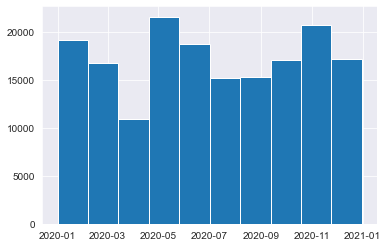

In [58]:
plt.hist(df_dates['CreatedDate'])

(array([2.2771e+04, 1.8109e+04, 2.2916e+04, 2.2733e+04, 1.8899e+04,
        1.9402e+04, 2.4335e+04, 2.2571e+04, 7.2000e+02, 3.0000e+00]),
 array([18262.47916667, 18307.97920602, 18353.47924537, 18398.97928472,
        18444.47932407, 18489.97936343, 18535.47940278, 18580.97944213,
        18626.47948148, 18671.97952083, 18717.47956019]),
 <BarContainer object of 10 artists>)

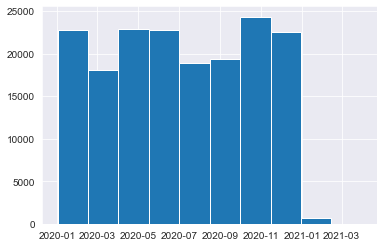

In [61]:
plt.hist(df_dates['UpdatedDate'])

In [62]:
dfCD_SD["ServiceDate"] = dfCD_SD["ServiceDate"].astype("datetime64")

In [84]:
dfCD_SD["ServiceDate"].max()

Timestamp('2020-12-30 10:52:43')

In [85]:
dfCD_SD[dfCD_SD["ServiceDate"] == dfCD_SD["ServiceDate"].min()]

,CreatedDateMonth,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AssignTo,ServiceDate,ClosedDate,AddressVerified,Address,ZipCode,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
369628,4,2020-04-13,2020-04-13 14:15:20,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:20,Y,"13309 W PAXTON ST, 91331",91331.0,502.0,C,1.0,North Valley APC,7.0,NaN,7.0,PACOIMA NC,FOOTHILL
369629,4,2020-04-13,2020-04-13 14:15:23,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:23,Y,"8987 N LAUREL CANYON BLVD, 91352",91352.0,502.0,F,7.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL
369630,4,2020-04-13,2020-04-13 14:15:27,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:26,Y,"8987 N LAUREL CANYON BLVD, 91352",91352.0,502.0,F,7.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL
369631,4,2020-04-13,2020-04-13 14:15:30,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:29,Y,"9009 N LAUREL CANYON BLVD, 91352",91352.0,502.0,F,7.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL
369632,4,2020-04-13,2020-04-13 14:15:33,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:32,Y,"8969 N LAUREL CANYON BLVD, 91352",91352.0,502.0,F,7.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL
369633,4,2020-04-13,2020-04-13 14:15:37,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:36,Y,"8969 N LAUREL CANYON BLVD, 91352",91352.0,502.0,F,7.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL
369634,4,2020-04-13,2020-04-13 14:15:40,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:39,Y,"MOREHART AVE AT SHELDON ST, 91352",91352.0,502.0,F,7.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL
369635,4,2020-04-13,2020-04-13 14:15:45,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:45,Y,"8432 N LAUREL CANYON BLVD, 91352",91352.0,532.0,G,1.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL
369636,4,2020-04-13,2020-04-13 14:15:17,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:17,Y,"7300 N WHITSETT AVE, 91605",91605.0,532.0,F,4.0,South Valley APC,2.0,NaN,23.0,NORTH HOLLYWOOD NORTHEAST NC,NORTH HOLLYWOOD
369637,4,2020-04-13,2020-04-13 14:15:51,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,N,NEGB,1919-08-19,2020-04-13 14:15:51,Y,"8432 N LAUREL CANYON BLVD, 91352",91352.0,532.0,G,1.0,North Valley APC,6.0,NaN,8.0,SUN VALLEY AREA NC,FOOTHILL


(array([1.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.72448e+05]),
 array([-18398.        , -14695.55467245, -10993.10934491,  -7290.66401736,
         -3588.21868981,    114.22663773,   3816.67196528,   7519.11729282,
         11221.56262037,  14924.00794792,  18626.45327546]),
 <BarContainer object of 10 artists>)

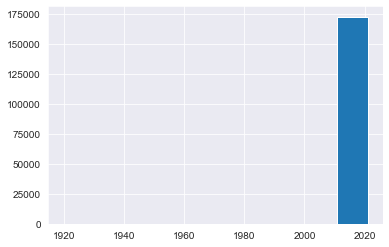

In [63]:
plt.hist(df_dates['ServiceDate'])

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.50000e+01, 1.72433e+05]),
 array([14665.        , 15064.55976157, 15464.11952315, 15863.67928472,
        16263.2390463 , 16662.79880787, 17062.35856944, 17461.91833102,
        17861.47809259, 18261.03785417, 18660.59761574]),
 <BarContainer object of 10 artists>)

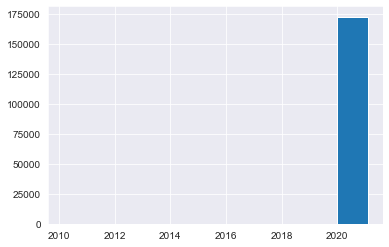

In [74]:
plt.hist(df_dates['ClosedDate'])

In [40]:
#Create a new 'CreatedDateMonth' column which contains the number of the month from 'CreatedDate' 
#so can group on it and do functions by month
df_dates['CreatedDateM'] = df_dates['CreatedDate'].dt.month

In [42]:
df_dates['UpdatedDateM'] = df_dates['UpdatedDate'].dt.month

In [44]:
df_dates['ServiceDateM'] = df_dates['ServiceDate'].dt.month

In [46]:
df_dates['ClosedDateM'] = df_dates['ClosedDate'].dt.month

In [47]:
df_dates.head()

,CreatedDate,UpdatedDate,ServiceDate,ClosedDate,CreatedDateM,UpdatedDateM,ServiceDateM,ClosedDateM
391,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00,1,1,12,1
392,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00,1,1,12,1
393,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00,1,1,12,1
394,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00,1,1,12,1
395,2020-01-01,2020-01-01 11:30:00,2019-12-05 11:11:00,2020-01-01 11:30:00,1,1,12,1


In [69]:
df_dates['CreatedDateM'].value_counts().sort_index()

1     17006
2     12349
3     11696
4     12576
5     17343
6     15606
7     13638
8     12987
9     12521
10    17657
11    14504
12    14576
Name: CreatedDateM, dtype: int64

(array([29355., 11696., 12576., 17343., 15606., 13638., 12987., 12521.,
        17657., 29080.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

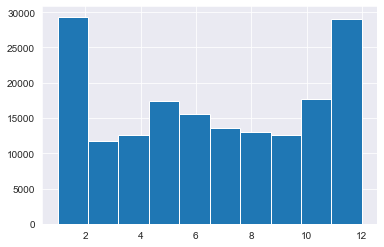

In [71]:
plt.hist(df_dates['CreatedDateM'])

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 5.02200e+03, 1.67426e+05]),
 array([14665.        , 15061.14532755, 15457.29065509, 15853.43598264,
        16249.58131019, 16645.72663773, 17041.87196528, 17438.01729282,
        17834.16262037, 18230.30794792, 18626.45327546]),
 <BarContainer object of 10 artists>)

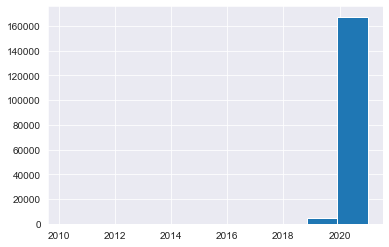

In [89]:
plt.hist(dfCD_SD[dfCD_SD["ServiceDate"] != dfCD_SD["ServiceDate"].min()].loc[:,'ServiceDate'])

In [87]:
dfCD_SD.shape

(172459, 26)

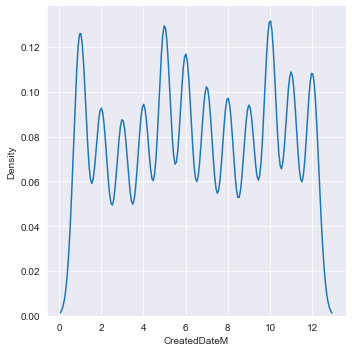

In [75]:
sns.displot(df_dates, x="CreatedDateM", kind="kde")

In [72]:
df_dates['ServiceDateM'].value_counts().sort_index()

1     14615
2     13585
3     12337
4     14883
5     14506
6     12505
7     13138
8     14586
9     12620
10    18158
11    15191
12    16335
Name: ServiceDateM, dtype: int64

(array([28200., 12337., 14883., 14506., 12505., 13138., 14586., 12620.,
        18158., 31526.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

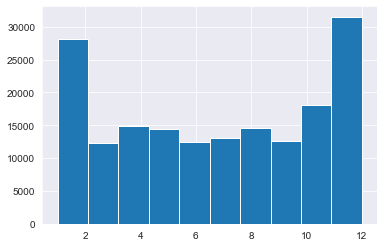

In [73]:
plt.hist(df_dates['ServiceDateM'])

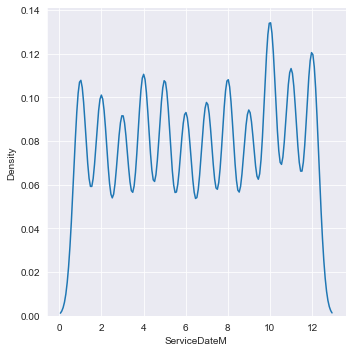

In [76]:
sns.displot(df_dates, x="ServiceDateM", kind="kde")

In [48]:
#Create a dataframe of just the months
df_datesM = df_dates.filter(['CreatedDateM','UpdatedDateM','ServiceDateM', 'ClosedDateM'], axis=1)

In [49]:
df_datesM.head()

,CreatedDateM,UpdatedDateM,ServiceDateM,ClosedDateM
391,1,1,12,1
392,1,1,12,1
393,1,1,12,1
394,1,1,12,1
395,1,1,12,1


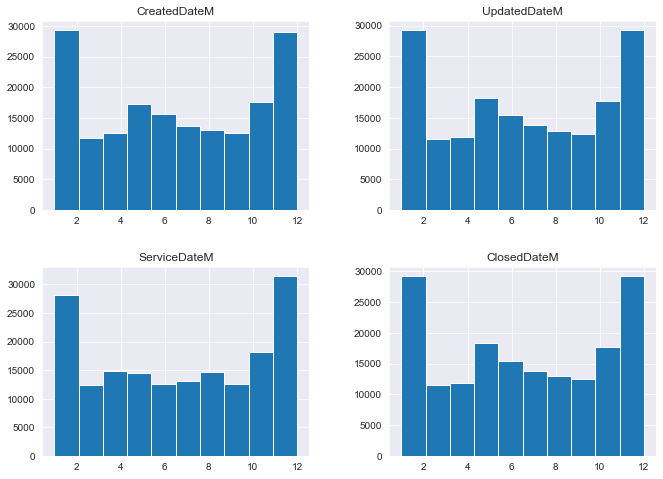

In [51]:
df_datesM.hist(figsize=(11,8));

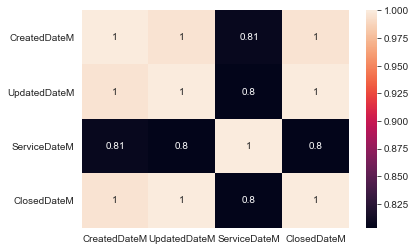

In [54]:
cor = df_datesM.corr()
sns.heatmap(cor, annot=True)
plt.show()

<font size=5, color=green>Create timedelta columns<font>

<font size=3 color=gray>Now after cleaning up all the datetime columns, it's time to create timedelta columns:<br>1. to_service: difference between createddate and servicedate<br>2. to_close: difference between createddate and closeddate<br>3. to_update: difference between createddate and updateddate<font>

<font size=5, color=green>Investigate on zipcodes<font>

<font size=3 color=gray>First we need to check if there is any recorde with null value or alphabetic value, then compare it with LA zipcodes (ZIPCode.csv is available and contains all the legitimate zipcodes for LA).<font>

<font size=2 color=Navy>Check for null and remove if there is any<font>

<font size=2 color=Navy>Check for non-numeric records and remove if there is any<font>

<font size=2 color=Navy>Compare with legitimate zipcodes and remove non-legitimates<font>

In [ ]:
df_laZipcode = pd.read_csv('ZIPCode.csv')

<font size=5, color=green>Investigate on categorical fields<font>

<font size=3 color=gray>Select useful columns, explanation of each field is available here:<br>https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2020/rq3b-xjk8<br> then investigate on each feature and fix if there is any issue<font>

In [ ]:
col = ['actiontaken', 'owner', 'requesttype', 'status', 'requestsource', 'createdbyuserorganization', 'mobileos', \
      'anonymous', 'assignto', 'addressverified', 'approximateaddress', 'apc', 'cd', 'cdmember', 'nc', 'ncname', \
      'policeprecinct']

In [ ]:
print('***actiontaken***')
print('-----------------')
print('Type is:')
print(df311.actiontaken.dtypes)
print('Null reacords:')
print(df311.actiontaken.isnull().sum())
print('Unique values:')
print(df311.actiontaken.unique())

<font size=2 color=Navy>Remove null records in this field<font>

In [ ]:
df311 = df311[df311.assignto.notnull()]

In [ ]:
print('***addressverified***')
print('---------------------')
print('Type is:')
print(df311.addressverified.dtypes)
print('Null reacords:')
print(df311.addressverified.isnull().sum())
print('Unique values:')
print(df311.addressverified.unique())

<font size=2 color=Navy>There won't be any report / dashboard based on this field, so we can keep it will all null values<font>

<font size=2 color=Navy>Remove null records in this field<font>

<font size=2 color=Navy>Remove null records in this field and then change the type to int64<font>

<font size=2 color=Navy>Remove null records in this field<font>

<font size=2 color=Navy>There are many records which has both nc and ncmember with null value, remove all of them<font>

<font size=2 color=Navy>Now cleaning up the ncname column<font>

<font size=5, color=green>Save the clean data set to a csv file<font>

# Now that you have gotten a quick overview of this dataset, you can begin exploring it on your own!

In [ ]:
print('Done!')